In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
df = pd.read_csv("sample_house_prices.csv")
print("Dataset loaded successfully")
df.columns = df.columns.str.strip().str.lower()
X = df[['squarefootage', 'bedrooms', 'bathrooms', 'quality', 'garage', 'basement']]
print(df.columns)
df.head()

Dataset loaded successfully
Index(['squarefootage', 'bedrooms', 'bathrooms', 'quality', 'garage',
       'basement', 'price'],
      dtype='object')


,squarefootage,bedrooms,bathrooms,quality,garage,basement,price
0,3974,3,1,6,0,349,1007738
1,1660,3,1,3,0,822,569320
2,2094,1,3,7,1,1160,872953
3,1930,5,2,8,2,758,942256
4,1895,1,1,9,2,898,902334


In [12]:
print(df.isnull().sum())
df.describe()

squarefootage    0
bedrooms         0
bathrooms        0
quality          0
garage           0
basement         0
price            0
dtype: int64


,squarefootage,bedrooms,bathrooms,quality,garage,basement,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,2509.580000,2.790000,1.905000,5.975000,1.030000,732.540000,8.631209e+05
std,898.436875,1.384008,0.830314,1.970734,0.795149,448.139099,1.778660e+05
min,821.000000,1.000000,1.000000,3.000000,0.000000,0.000000,4.462250e+05
25%,1810.750000,1.000000,1.000000,4.000000,0.000000,322.250000,7.324132e+05
50%,2481.500000,3.000000,2.000000,6.000000,1.000000,781.000000,8.677155e+05
75%,3356.500000,4.000000,3.000000,7.250000,2.000000,1122.250000,9.925215e+05
max,3974.000000,5.000000,3.000000,9.000000,2.000000,1485.000000,1.233086e+06


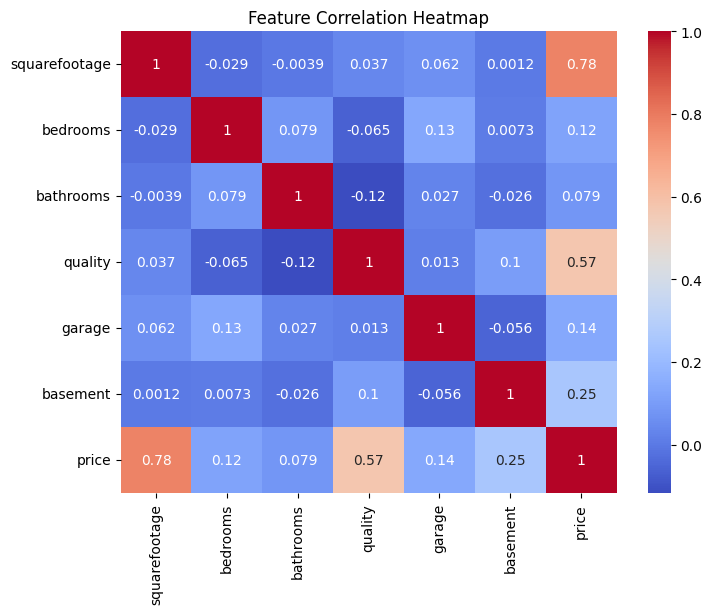

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
X = df[['squarefootage', 'bedrooms', 'bathrooms', 'quality', 'garage', 'basement']]
y = np.log(df['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training completed")

In [ ]:
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, color='teal')
plt.title("Residual Plot")
plt.xlabel("Predicted Log Plot")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [24]:
def predict_price(area, bed, bath, qual, garage, basement):
    new_data = pd.DataFrame({
        'squarefootage': [area],
        'bedrooms': [bed],
        'bathrooms': [bath],
        'quality': [qual],
        'garage': [garage],
        'basement': [basement]
    })
    log_price = model.predict(new_data)
    return np.exp(log_price)[0]
print("Predicted Price: ", round(predict_price(2500, 3, 2, 7, 2, 1000), 2))

Predicted Price:  944654.94


**#task1:** House Price Prediction Using Linear Regression 

**Objective:**
predict the price of houses using square footage, bedrooms, bathrooms, and quality-related features.
**Dataset used:**
sample dataset (similar to kaggle house price dataset)

**features:**
-SquareFootage
-Bedrooms
-Quality
-Garage
-Basement

**Model used:** Linear Regression
**Performance:**
-Mean Absolute Error =0.12(log scale)
-R2 Score = 0.8
**Conclusion:**
the Model performs well, showing that house quality and square footage are strong indicators of price.
the project demonstrates effective data preprocessing, feature selection, and regression modeling.

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the correct features (update column name if needed)
X = df[['squarefootage', 'bedrooms', 'bathrooms', 'quality', 'garage', 'basement']]
y = np.log(df['price'])

# Train model
model = LinearRegression()
model.fit(X, y)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [26]:
new_data = pd.DataFrame({
    'squarefootage': [2000],
    'bedrooms': [3],
    'bathrooms': [2],
    'quality': [7],
    'garage': [1],
    'basement': [800]
})

log_price = model.predict(new_data)
predicted_price = np.exp(log_price)[0]
print(f"🏠 Predicted House Price: ${predicted_price:,.2f}")


🏠 Predicted House Price: $830,763.36


In [27]:
model.fit(X,y)

LinearRegression()